<a href="https://colab.research.google.com/github/Ronnakorn2004/Truck-sales_Time-Series-Class-Final-Project-/blob/main/Truck_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
import warnings
import statsmodels

# ADD THIS TO THE TOP OF YOUR SCRIPT:
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    module='statsmodels'
)

In [ ]:
# Connect to GoogleDrive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read a file from GoogleDrive.
file_path = '/content/drive/MyDrive/Colab Notebooks/Truck_sales.csv'
df = pd.read_csv(file_path)

In [ ]:
# Display the first 5 rows to get a quick look at the data structure.
df.head()

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223


In [ ]:
# Check total length of dataset.
len(df)

144

In [ ]:
# Check for data type in each column.
df.dtypes

,0
Month-Year,object
Number_Trucks_Sold,int64


In [ ]:
# Define target.
label = 'Number_Trucks_Sold'

In [ ]:
# Define timestamp column.
ts = 'Month-Year'

In [ ]:
# Change timestamp column from string to datetime.
df[ts] = pd.to_datetime(df[ts], format="%y-%b")

In [ ]:
# Check for data type again.
df.dtypes

,0
Month-Year,datetime64[ns]
Number_Trucks_Sold,int64


In [ ]:
# Set Timestamp Index
df.index = df[ts]

In [ ]:
# Select observation column.
df = df[[label]]

In [ ]:
# Check duplicate index.
df[df.index.duplicated(keep=False)]

,Number_Trucks_Sold
Month-Year,


In [ ]:
# Check for missing values in each column.
df.isnull().sum()

,0
Number_Trucks_Sold,0


In [ ]:
# Check timestamp diff.
df.index.diff().value_counts()

,count
Month-Year,
31 days,83
30 days,48
28 days,9
29 days,3


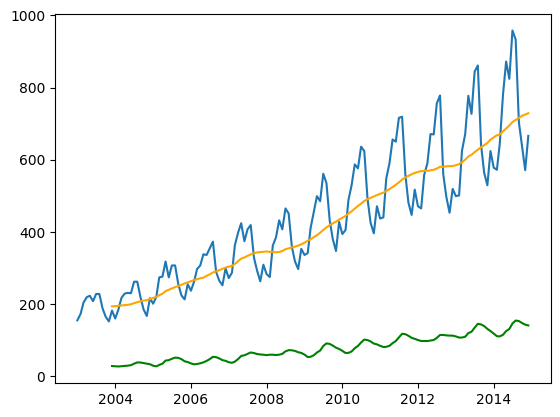

In [ ]:
# Plot observation.
plt.plot(df.index, df[label])
# Plot rolling mean of observation for 12 months.
plt.plot(df.index, df[label].rolling(window=12).mean(), color='orange')
# Plot rolling std of observation for 24 hours * 7 days.
plt.plot(df.index, df[label].rolling(window=12).std(), color='green')
plt.show()

Component

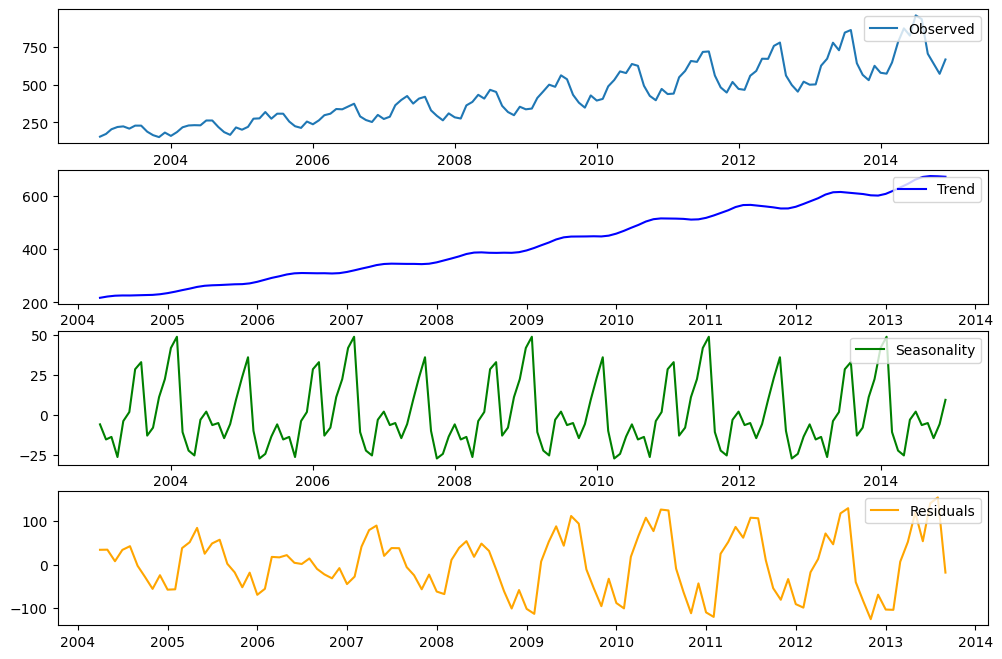

In [ ]:
# Create decomposition.
decomposition = seasonal_decompose(df, model='additive', period=30)


plt.figure(figsize=(12, 8))

# Plot observation.
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper right')

# Plot trend component.
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.legend(loc='upper right')

# Plot seasonal component.
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper right')

# Plot residual component.
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='orange')
plt.legend(loc='upper right')

plt.show()

Autocorrelation

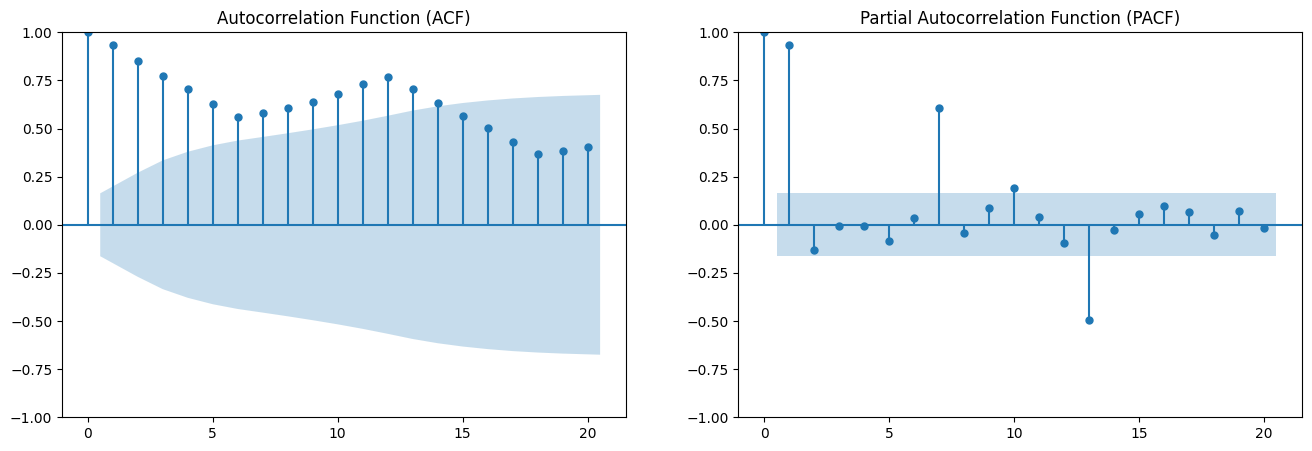

In [ ]:
# Create subplot.
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot ACF.
plot_acf(df[label], lags=20, ax=axes[0], title='Autocorrelation Function (ACF)')

# Plot PACF.
plot_pacf(df[label], lags=20, ax=axes[1], title='Partial Autocorrelation Function (PACF)')

plt.show()

Data Splitting

In [ ]:
# Define ratio of each dataset.
train_ratio = 0.7

# Set end point of each data set.
train_end = int(len(df) * train_ratio)

# Split data.
train_data = df[label].iloc[:train_end]
test_data = df[label].iloc[train_end:]

In [ ]:
# Check training set.
train_data

,Number_Trucks_Sold
Month-Year,
2003-01-01,155
2003-02-01,173
2003-03-01,204
2003-04-01,219
2003-05-01,223
...,...
2010-12-01,471
2011-01-01,437
2011-02-01,440


In [ ]:
# Check test set.
test_data

,Number_Trucks_Sold
Month-Year,
2011-05-01,656
2011-06-01,650
2011-07-01,716
2011-08-01,719
2011-09-01,560
2011-10-01,481
2011-11-01,447
2011-12-01,517
2012-01-01,471


Model Training

In [ ]:
# Set look back period.
look_back = 36

# Set prediction step.
look_forward = 6

Hyperparameter Tuning

In [ ]:
from os import O_DIRECT
# Create hyperparameter
p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 3)

# Set up initial mean square error.
min_mse = np.inf

# Set up initial hyperparameter.
best_order = None

# Iterate to find the best hyperparameter.
print("Start Training")
for p in p_range:
  for d in d_range:
    for q in q_range:
      # Create order.
      order = (p, d, q)
      print(f"     Training order: {order}")

      # Create a list of mse to collect mse on each timeframe.
      mse_list = []

      # Iterate timeframe on training set.
      for i in range(look_back, len(train_data) - look_forward):
        # Setup validation range.
        input_data = train_data.iloc[i - look_back:i]
        val_data = train_data.iloc[i:i + look_forward]
        val_start_index = val_data.index[0]
        val_end_index = val_data.index[-1]

        # Fit model on each setting.
        model = ARIMA(input_data, order=order)
        model_fit = model.fit()

        # Forecast the validation period.
        pred_data = model_fit.predict(start=val_start_index, end=val_end_index)

        # Align indices for error calculation.
        pred_data.index = val_data.index

        # Test result on validation set.
        mse_list.append(mean_squared_error(val_data, pred_data))

      # Average final mse of the order.
      mse = np.mean(mse_list)

      print(f"     MSE: {mse}")
      print(f"     Min MSE: {min_mse}")

      # Keep the setting if performance improve.
      if mse < min_mse:
          min_mse = mse
          best_order = order

# Check the best setting.
print(f"best_order: {best_order}")
print(f"min_mse: {min_mse}")

Start Training
     Training order: (0, 0, 0)
     MSE: 11217.526895111023
     Min MSE: inf
     Training order: (0, 0, 1)
     MSE: 10180.020264549848
     Min MSE: 11217.526895111023
     Training order: (0, 0, 2)
     MSE: 9358.232325180874
     Min MSE: 10180.020264549848
     Training order: (0, 1, 0)
     MSE: 10229.899425287356
     Min MSE: 9358.232325180874
     Training order: (0, 1, 1)
     MSE: 10318.093789949322
     Min MSE: 9358.232325180874
     Training order: (0, 1, 2)
     MSE: 10472.129015036233
     Min MSE: 9358.232325180874
     Training order: (1, 0, 0)
     MSE: 8959.686403045662
     Min MSE: 9358.232325180874
     Training order: (1, 0, 1)
     MSE: 8906.310270751366
     Min MSE: 8959.686403045662
     Training order: (1, 0, 2)
     MSE: 9171.760597040395
     Min MSE: 8906.310270751366
     Training order: (1, 1, 0)
     MSE: 10385.08958768356
     Min MSE: 8906.310270751366
     Training order: (1, 1, 1)
     MSE: 10311.385588583362
     Min MSE: 8906.310

## Model Evaluation

Evaluate training set

In [ ]:
# Create lists of metrics.
mae_list = []
mse_list = []
rmse_list = []
mape_list = []

# Predict training set.
for i in range(look_back, len(train_data) - look_forward):
  # Setup prediction range.
  input_data = train_data.iloc[i - look_back:i]
  eval_data = train_data.iloc[i:i + look_forward]
  eval_start_index = eval_data.index[0]
  eval_end_index = eval_data.index[-1]

  # Fit model on each evaluation period.
  model = ARIMA(input_data, order=best_order)
  model_fit = model.fit()

  # Forecast the evaluation period.
  pred_data = model_fit.predict(start=eval_start_index, end=eval_end_index)

  # Align indices for error calculation.
  pred_data.index = eval_data.index

  # Calculate mertics on each evaluation.
  mse_list.append(mean_squared_error(eval_data, pred_data))
  rmse_list.append(np.sqrt(mean_squared_error(eval_data, pred_data)))
  mae_list.append(mean_absolute_error(eval_data, pred_data))
  mape_list.append(np.mean(np.abs((eval_data - pred_data) / eval_data)) * 100)

# Average final metrics.
mse = np.mean(mse_list)
rmse = np.mean(rmse_list)
mae = np.mean(mae_list)
mape = np.mean(mape_list)


In [ ]:
# Print results.
print(f"Mean: {train_data.mean():.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean: 333.96
Mean Absolute Error (MAE): 76.06
Mean Absolute Percentage Error (MAPE): 18.25
Root Mean Squared Error (RMSE): 87.27


Evaluate test set

In [ ]:
# Create lists of metrics.
mae_list = []
mape_list = []
mse_list = []
rmse_list = []

# Predict test set.
for i in range(look_back, len(test_data) - look_forward):
  # Setup prediction range.
  input_data = test_data.iloc[i - look_back:i]
  eval_data = test_data.iloc[i:i + look_forward]
  eval_start_index = eval_data.index[0]
  eval_end_index = eval_data.index[-1]

  # Fit model on each evaluation period.
  model = ARIMA(input_data, order=best_order)
  model_fit = model.fit()

  # Forecast the evaluation period.
  pred_data = model_fit.predict(start=eval_start_index, end=eval_end_index)

  # Align indices for error calculation.
  pred_data.index = eval_data.index

  # Calculate mertics on each evaluation.
  mse_list.append(mean_squared_error(eval_data, pred_data))
  rmse_list.append(np.sqrt(mean_squared_error(eval_data, pred_data)))
  mae_list.append(mean_absolute_error(eval_data, pred_data))
  mape_list.append(np.mean(np.abs((eval_data - pred_data) / eval_data)) * 100)

# Average final metrics.
mse = np.mean(mse_list)
rmse = np.mean(rmse_list)
mae = np.mean(mae_list)
mape = np.mean(mape_list)


In [ ]:
# Print results.
print(f"Mean: {train_data.mean():.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean: 333.96
Mean Absolute Error (MAE): 121.90
Mean Absolute Percentage Error (MAPE): 13.99
Root Mean Squared Error (RMSE): 157.42


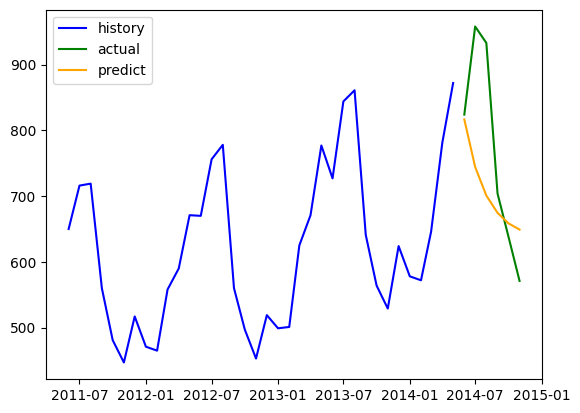

In [ ]:
# Plot example trend prediction.
plt.plot(input_data.index, input_data.values, label='history', color='blue')
plt.plot(eval_data.index, eval_data.values, label='actual', color='green')
plt.plot(pred_data.index, pred_data.values, label='predict', color='orange')
plt.legend()
plt.show()

SARIMA Model

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

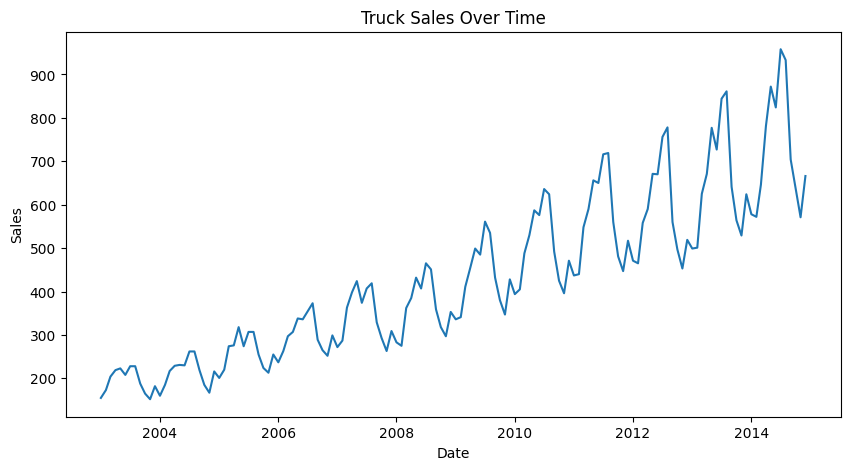

In [ ]:
# แสดงกราฟ
plt.figure(figsize=(10,5))
plt.plot(df['Number_Trucks_Sold'])
plt.title('Truck Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
# ตรวจสอบ Stationarity
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("Series is Stationary")
    else:
        print("Series is NOT Stationary")

adf_test(df['Number_Trucks_Sold'])

ADF Statistic: 1.1158932574252673
p-value: 0.9953500083802601
Series is NOT Stationary


มันไม่มี stationary เลยต้องทำ differencing 1 ครั้ง

In [ ]:
df['Sales_diff'] = df['Number_Trucks_Sold'].diff()

In [ ]:
# ทดสอบอีกครั้ง
adf_test(df['Sales_diff'].dropna())

ADF Statistic: -2.541355326769904
p-value: 0.10573354923819939
Series is NOT Stationary


In [ ]:
# ยังไม่ stationary (p-value > 0.05)
# ลอง seasonal differencing (ลบค่าของเดือนเดียวกันปีก่อน)
df['Sales_diff'] = df['Number_Trucks_Sold'] - df['Number_Trucks_Sold'].shift(12)
adf_test(df['Sales_diff'].dropna())

ADF Statistic: -3.507930040939535
p-value: 0.00778575418582741
Series is Stationary


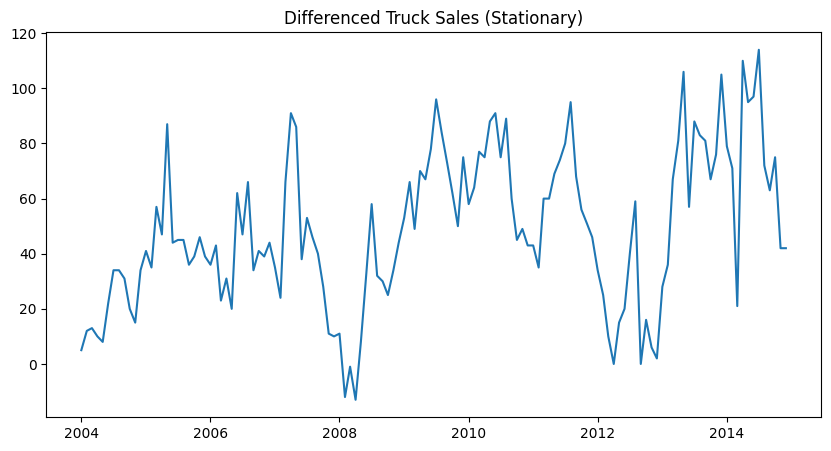

In [ ]:
# ผ่านแล้ว (stationary แล้ว)
plt.figure(figsize=(10,5))
plt.plot(df['Sales_diff'])
plt.title("Differenced Truck Sales (Stationary)")
plt.show()

In [ ]:
# --- สร้างโมเดล SARIMA ---
# กำหนดชุดค่าพารามิเตอร์ที่ต้องลอง
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = 12  # ข้อมูลรายเดือน

best_aic = np.inf
best_params = None

for param in itertools.product(p, d, q):
    for seasonal_param in itertools.product(P, D, Q, [s]):
        #try:
        model = SARIMAX(df['Number_Trucks_Sold'], # Changed 'Sales' to 'Number_Trucks_Sold'
                        order=param,
                        seasonal_order=seasonal_param,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        results = model.fit(disp=False)
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = (param, seasonal_param)
        #except Exception as e: # Removed try-except to see specific errors
        #    print(f"Error fitting SARIMA model with order {param} and seasonal order {seasonal_param}: {e}")
        #    continue

print(f"✅ Best SARIMA parameters: {best_params}, AIC={best_aic:.2f}")

✅ Best SARIMA parameters: ((0, 1, 1), (0, 1, 1, 12)), AIC=1036.50


In [ ]:
# --- ฝึกโมเดลด้วยพารameter ที่ดีที่สุด ---
if best_params is not None: # Added check for None
    order, seasonal_order = best_params
    model = SARIMAX(df['Number_Trucks_Sold'], # Changed 'Sales' to 'Number_Trucks_Sold'
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    results = model.fit()

    print(results.summary())
else: # Added else block to inform the user if no best_params were found
    print("❗ No best parameters found during tuning. Cannot fit the final model.")

                                     SARIMAX Results                                      
Dep. Variable:                 Number_Trucks_Sold   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -515.252
Date:                            Sun, 12 Oct 2025   AIC                           1036.504
Time:                                    10:04:01   BIC                           1044.790
Sample:                                01-01-2003   HQIC                          1039.868
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3122      0.078     -3.978      0.000      -0.466      -0.158
ma.S.L12      -0.0757      0.096   

In [ ]:
# --- พยากรณ์ (Forecast) 12 เดือนถัดไป ---
forecast = results.get_forecast(steps=12)
pred_ci = forecast.conf_int()

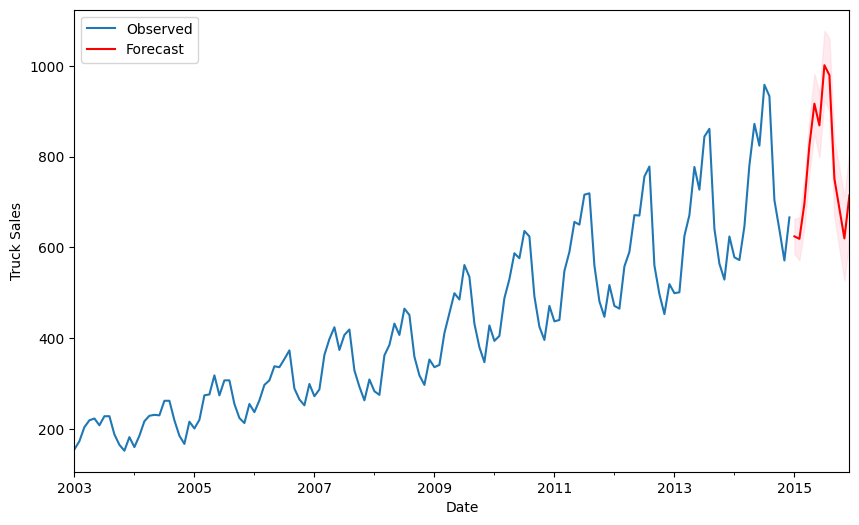

In [ ]:
# --- แสดงผลลัพธ์ ---
ax = df['Number_Trucks_Sold'].plot(label='Observed', figsize=(10,6))
forecast.predicted_mean.plot(ax=ax, label='Forecast', color='r')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='pink', alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('Truck Sales')
plt.legend()
plt.show()

SARIMAX Model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
# แยก train/test
train = df.iloc[:-12]
test = df.iloc[-12:]

In [ ]:
# สร้างโมเดล SARIMAX (ไม่มี exogenous)
model = SARIMAX(train['Number_Trucks_Sold'], order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

In [ ]:
# พยากรณ์
forecast = result.get_forecast(steps=12)
pred_ci = forecast.conf_int()

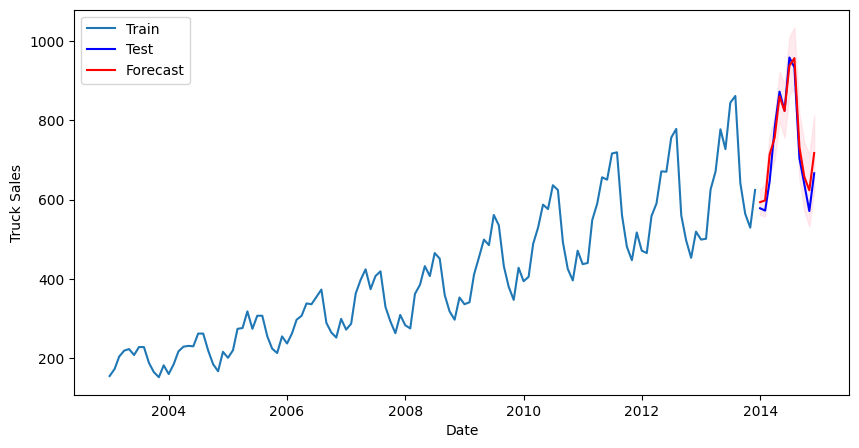

In [ ]:
# แสดงผล
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Number_Trucks_Sold'], label='Train')
plt.plot(test.index, test['Number_Trucks_Sold'], label='Test', color='blue')
plt.plot(test.index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(test.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Truck Sales')
plt.legend()
plt.show()

In [ ]:
# คำนวณความแม่นยำ
mae = mean_absolute_error(test['Number_Trucks_Sold'], forecast.predicted_mean)
rmse = np.sqrt(mean_squared_error(test['Number_Trucks_Sold'], forecast.predicted_mean))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 28.39
RMSE: 33.77


Prophet Model

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# เปลี่ยนชื่อคอลัมน์ให้เข้ากับ Prophet
# Read the original file again to get the correct columns
file_path = '/content/drive/MyDrive/Colab Notebooks/Truck_sales.csv'
df_prophet = pd.read_csv(file_path)

# Convert 'Month-Year' to datetime and rename columns for Prophet
df_prophet['Month-Year'] = pd.to_datetime(df_prophet['Month-Year'], format="%y-%b")
df_prophet = df_prophet.rename(columns={'Month-Year': 'ds', 'Number_Trucks_Sold': 'y'})

# Now use df_prophet for the rest of the Prophet steps
df = df_prophet

In [ ]:
# แยกชุดข้อมูล train/test (12 เดือนสุดท้ายเป็น test)
train = df.iloc[:-12]
test = df.iloc[-12:]

In [ ]:
# สร้างโมเดล Prophet
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42hx1twd/9tgwjtl9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42hx1twd/l5sv1wa_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76040', 'data', 'file=/tmp/tmp42hx1twd/9tgwjtl9.json', 'init=/tmp/tmp42hx1twd/l5sv1wa_.json', 'output', 'file=/tmp/tmp42hx1twd/prophet_modell50se__s/prophet_model-20251012100517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:05:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:05:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# พยากรณ์อนาคต 12 เดือน
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


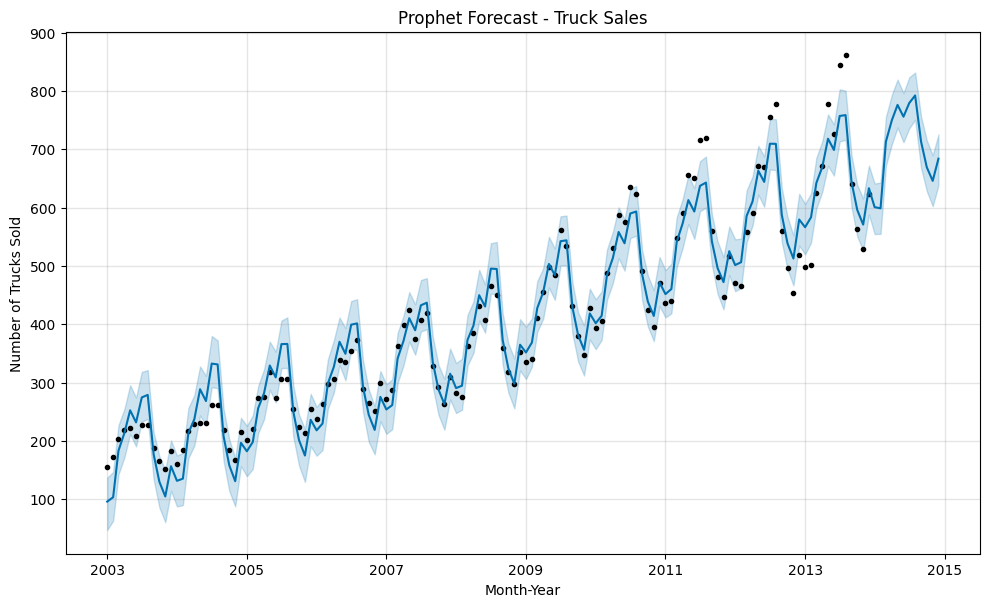

In [ ]:
# แสดงผลกราฟพยากรณ์
model.plot(forecast)
plt.title('Prophet Forecast - Truck Sales')
plt.xlabel('Month-Year')
plt.ylabel('Number of Trucks Sold')
plt.show()


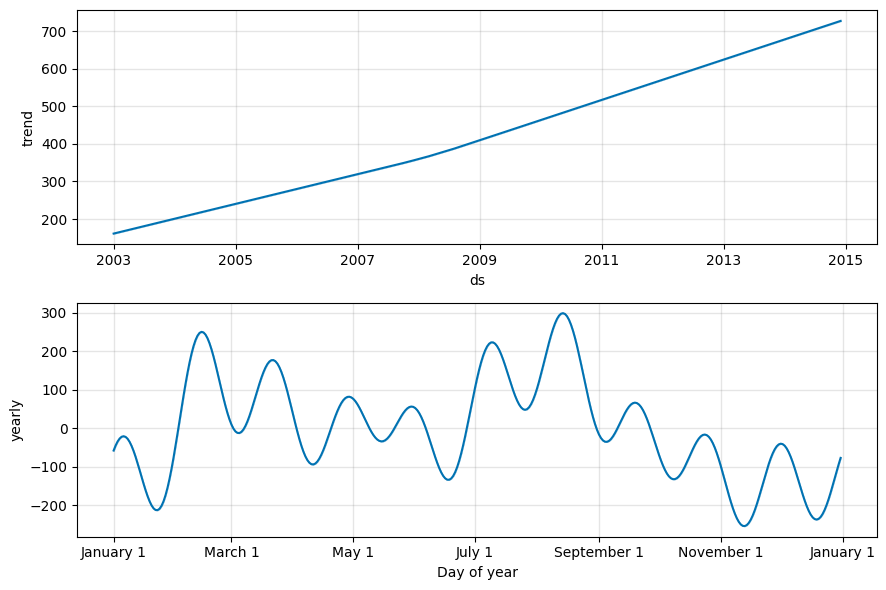

In [ ]:
# แสดงแนวโน้มและฤดูกาล
model.plot_components(forecast)
plt.show()

In [ ]:
# ประเมินความแม่นยำ (เฉพาะช่วง test)
pred = forecast.iloc[-12:]['yhat']
mae = mean_absolute_error(test['y'], pred)
rmse = np.sqrt(mean_squared_error(test['y'], pred))

print(f"MAE (Prophet): {mae:.2f}")
print(f"RMSE (Prophet): {rmse:.2f}")

MAE (Prophet): 63.63
RMSE (Prophet): 81.27


LSTMs Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
# โหลดข้อมูล
file_path = '/content/drive/MyDrive/Colab Notebooks/Truck_sales.csv'
df = pd.read_csv(file_path)
df['Month-Year'] = pd.to_datetime(df['Month-Year'], format="%y-%b")
df.set_index('Month-Year', inplace=True)

In [ ]:
# ใช้เฉพาะคอลัมน์ยอดขาย
data = df[['Number_Trucks_Sold']].values

In [ ]:
# สเกลข้อมูล
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
# สร้างลำดับข้อมูล (ใช้ข้อมูลย้อนหลัง 12 เดือน เพื่อพยากรณ์เดือนถัดไป)
def create_dataset(dataset, look_back=12):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 12
X, y = create_dataset(data_scaled, look_back)


In [ ]:
# แบ่ง train/test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# ปรับรูปให้เข้ากับ LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# สร้างโมเดล LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# เทรนโมเดล
model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0899
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0142
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0121
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0089
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090
Epoc

In [ ]:
# พยากรณ์
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


In [ ]:
# กลับสเกลค่า
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

In [ ]:
# ประเมินผล
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"MAE (LSTM): {mae:.2f}")
print(f"RMSE (LSTM): {rmse:.2f}")

MAE (LSTM): 57.36
RMSE (LSTM): 71.11


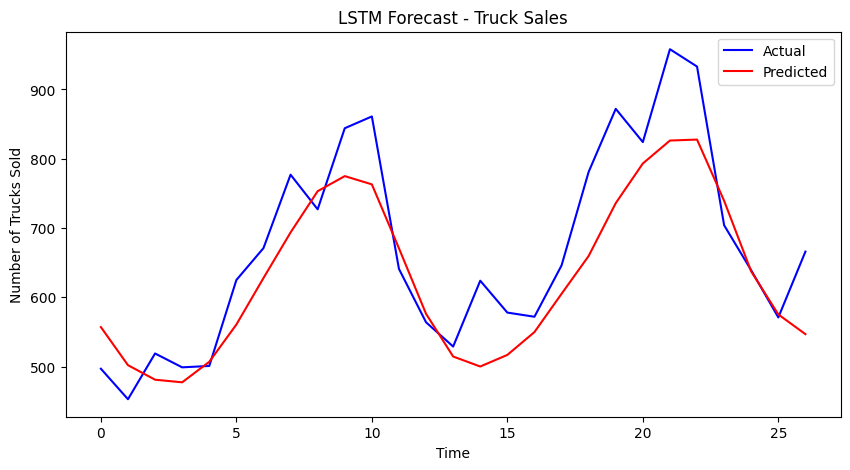

In [ ]:
# กราฟเปรียบเทียบ
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual', color='blue')
plt.plot(y_pred_inv, label='Predicted', color='red')
plt.title('LSTM Forecast - Truck Sales')
plt.xlabel('Time')
plt.ylabel('Number of Trucks Sold')
plt.legend()
plt.show()

เสร็จแล้วแต่อยากลองปรับ Keras เป็นเวอร์ชันใหม่

In [ ]:
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(look_back, 1)))  # ระบุ Input ก่อน
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')


In [ ]:
# เทรนโมเดล
model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0523
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0082
Epo

In [ ]:
# พยากรณ์
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


In [ ]:
# กลับสเกลค่า
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

In [ ]:
# ประเมินผล
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"MAE (LSTM): {mae:.2f}")
print(f"RMSE (LSTM): {rmse:.2f}")

MAE (LSTM): 66.26
RMSE (LSTM): 81.18


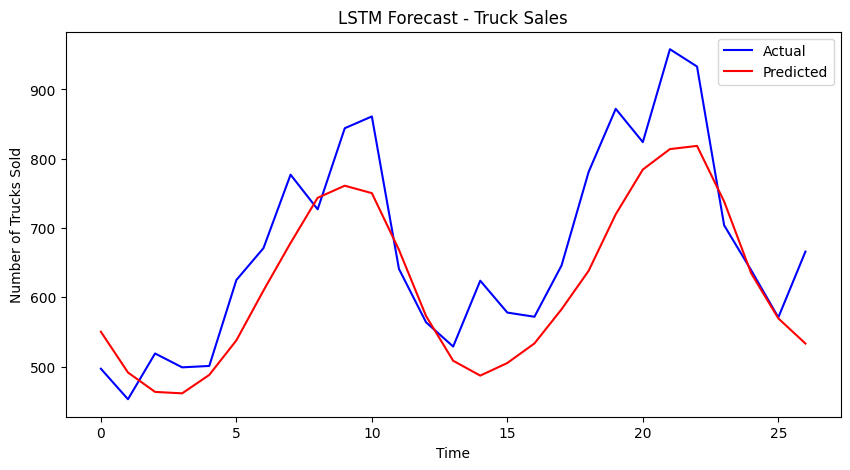

In [ ]:
# กราฟเปรียบเทียบ
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual', color='blue')
plt.plot(y_pred_inv, label='Predicted', color='red')
plt.title('LSTM Forecast - Truck Sales')
plt.xlabel('Time')
plt.ylabel('Number of Trucks Sold')
plt.legend()
plt.show()